In [259]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import lxml
import requests
import numpy as np
 

url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
df  = pd.read_html(url)[12].set_index('Регіон')
#Вивести перші рядки таблиці за допомогою методу head
df.head()


,1950,1960,1970,1990,2000,2012,2014,2019
Регіон,,,,,,,,
Крим,230.0,206.0,160.0,130,73,126,—,—
Вінницька,224.0,192.0,142.0,124,84,112,109,76
Волинська,247.0,250.0,179.0,153,112,148,141,101
Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
Донецька,271.0,214.0,140.0,109,61,98,82,—


In [260]:
#Визначте кількість рядків та стовпців у датафреймі
print(df.shape)

(28, 8)


In [261]:
#Замініть у таблиці значення "—" на значення NaN 
df = df.replace('—',np.nan)
df1 = df.replace('—',np.nan)

In [262]:
#Визначте кількість рядків та стовпців у датафреймі
print(df.dtypes)

1950    float64
1960    float64
1970    float64
1990      int64
2000      int64
2012      int64
2014     object
2019     object
dtype: object


In [263]:
df = df.astype({"2014":float, "2019":float})
df

,1950,1960,1970,1990,2000,2012,2014,2019
Регіон,,,,,,,,
Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0
Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
Дніпропетровська,204.0,204.0,151.0,123,71,112,111.0,71.0
Донецька,271.0,214.0,140.0,109,61,98,82.0,NaN
Житомирська,261.0,223.0,159.0,129,89,122,120.0,79.0
Закарпатська,314.0,273.0,207.0,168,115,151,146.0,104.0
Запорізька,219.0,197.0,150.0,124,71,106,106.0,68.0
Івано-Франківська,243.0,248.0,182.0,155,103,124,122.0,88.0


In [264]:
df.isna().sum()

1950    2
1960    1
1970    1
1990    0
2000    0
2012    0
2014    2
2019    4
dtype: int64

In [265]:
df = df.drop(['Україна'])
df

,1950,1960,1970,1990,2000,2012,2014,2019
Регіон,,,,,,,,
Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0
Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
Дніпропетровська,204.0,204.0,151.0,123,71,112,111.0,71.0
Донецька,271.0,214.0,140.0,109,61,98,82.0,NaN
Житомирська,261.0,223.0,159.0,129,89,122,120.0,79.0
Закарпатська,314.0,273.0,207.0,168,115,151,146.0,104.0
Запорізька,219.0,197.0,150.0,124,71,106,106.0,68.0
Івано-Франківська,243.0,248.0,182.0,155,103,124,122.0,88.0


In [266]:
df =df.fillna(df.mean())
df


,1950,1960,1970,1990,2000,2012,2014,2019
Регіон,,,,,,,,
Крим,230.00,206.000000,160.0,130,73,126,111.44,80.173913
Вінницька,224.00,192.000000,142.0,124,84,112,109.00,76.000000
Волинська,247.00,250.000000,179.0,153,112,148,141.00,101.000000
Дніпропетровська,204.00,204.000000,151.0,123,71,112,111.00,71.000000
Донецька,271.00,214.000000,140.0,109,61,98,82.00,80.173913
Житомирська,261.00,223.000000,159.0,129,89,122,120.00,79.000000
Закарпатська,314.00,273.000000,207.0,168,115,151,146.00,104.000000
Запорізька,219.00,197.000000,150.0,124,71,106,106.00,68.000000
Івано-Франківська,243.00,248.000000,182.0,155,103,124,122.00,88.000000


In [267]:
df[df['2019']>df['2019'].mean()]

,1950,1960,1970,1990,2000,2012,2014,2019
Регіон,,,,,,,,
Волинська,247.00,250.0,179.0,153,112,148,141.0,101.0
Закарпатська,314.00,273.0,207.0,168,115,151,146.0,104.0
Івано-Франківська,243.00,248.0,182.0,155,103,124,122.0,88.0
Львівська,234.00,240.0,171.0,140,91,119,119.0,87.0
Одеська,241.00,192.0,148.0,126,80,127,123.0,88.0
Рівненська,269.00,267.0,193.0,158,118,159,148.0,107.0
Херсонська,208.00,214.0,166.0,143,85,117,115.0,81.0
Чернівецька,247.00,218.0,170.0,148,101,128,129.0,92.0
Київ,231.04,174.0,159.0,120,73,120,121.0,110.0


In [268]:
df[df['2014']==df['2014'].max()]

,1950,1960,1970,1990,2000,2012,2014,2019
Регіон,,,,,,,,
Рівненська,269.0,267.0,193.0,158,118,159,148.0,107.0


<Axes: xlabel='Регіон'>

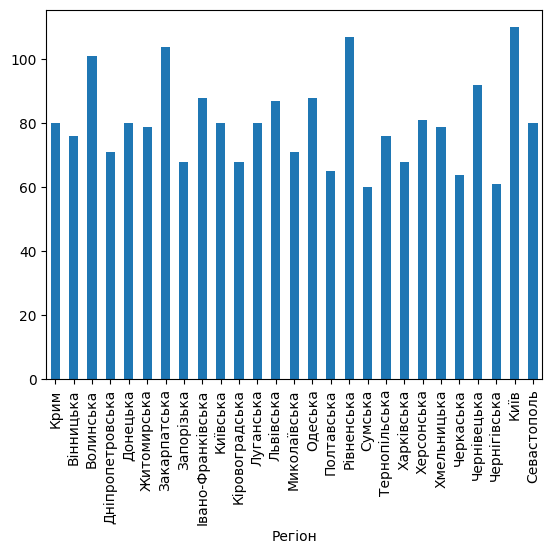

In [269]:
df['2019'].plot.bar()

(0.0, 290.0)

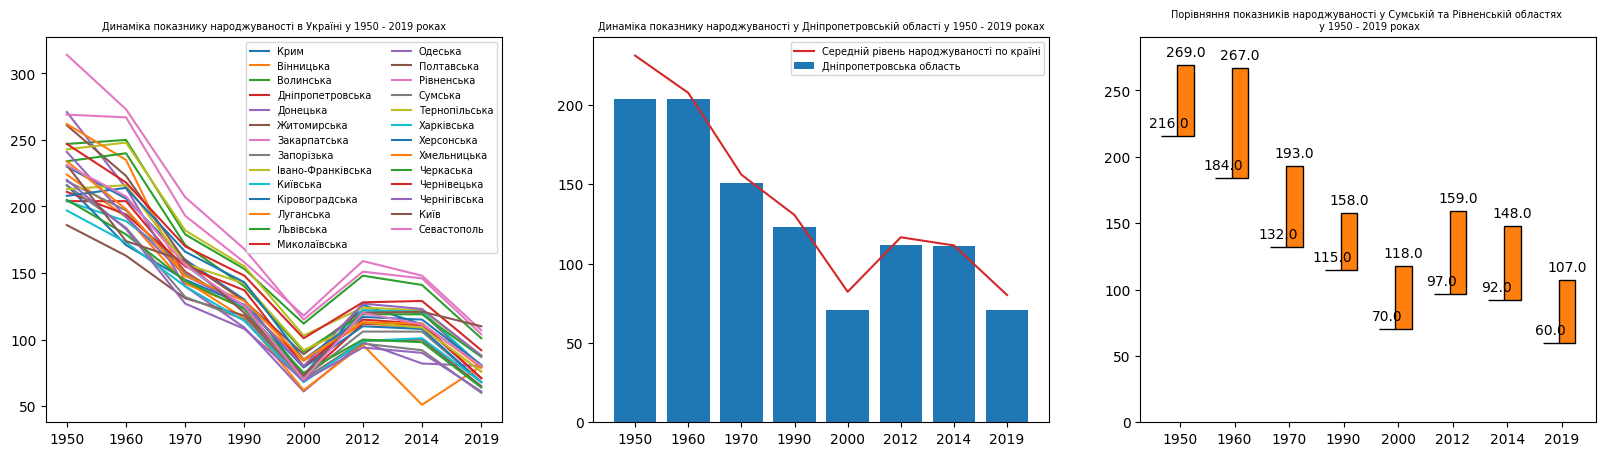

In [309]:
fig, ax = plt.subplots(1,3, figsize = (20,5))

ax[0].set_title('Динаміка показнику народжуваності в Україні у 1950 - 2019 роках', fontsize = 7)
ax[1].set_title('Динаміка показнику народжуваності у Дніпропетровській області у 1950 - 2019 роках', fontsize = 7)
ax[2].set_title('Порівняння показників народжуваності у Сумській та Рівненській областях \n у 1950 - 2019 роках', fontsize = 7,)

for index, row in df.iterrows():
    ax[0].plot(row)
ax[0].legend( list(df.index) , loc = 'upper right', ncol = 2,fontsize = 7)

average_birth_level = pd.Series(df.mean())
ax[1].bar(df.columns, df.loc['Дніпропетровська'])
ax[1].plot(average_birth_level, color = 'tab:red')
ax[1].legend( ['Середній рівень народжуваності по країні','Дніпропетровська область',] , loc = 'upper right', fontsize = 7)

def hat_graph(ax, xlabels, values, group_labels):
    def label_bars(heights, rects):
        for height, rect in zip(heights, rects):
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 4), 
                        textcoords='offset points',
                        ha='center', va='bottom')

    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels=xlabels)
    spacing = 0.4 
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
        rects = ax.bar(x - spacing/2 + i * width, heights - heights0,
                       width, bottom=heights0, label=group_label, **style)
        label_bars(heights, rects)
    
region1 = np.array(df.loc['Сумська'])
region2 = np.array(df.loc['Рівненська'])
hat_graph(ax[2], df.columns, [region1, region2 ], ['region1', 'region2'] )
ax[2].set_ylim(0, 290)


1950    231.040000
1960    207.576923
1970    156.000000
1990    130.592593
2000     82.222222
2012    116.555556
2014    111.440000
2019     80.173913
dtype: float64
